In [1]:
# normalize 
# rotation
# 

In [2]:
import numpy as np
from torch.utils.data import DataLoader
from torchvision import transforms
# from yjlib.Datasets import EndoDataset

In [3]:
# make a parameter
NAME_OF_CLASS = ['normal','lgd','hgd','cancer'] # This name same with name of file
JSON_PATH = '/disk1/yjkim/json/intestine/c4json'

BATCH_SIZE = 40
WORKERS = 2
IMG_SIZE = 224

In [13]:
train_dataset = EndoDataset(DATA_PATH=JSON_PATH,IMAGE_SIZE = IMG_SIZE, split='train',
                           get_path_flag=False)

In [14]:
train_loader = DataLoader(dataset = train_dataset, batch_size = BATCH_SIZE, shuffle = True, 
                                           num_workers = WORKERS, pin_memory = True)

## find image mean std

In [15]:
data, label = next(iter(train_loader))

In [30]:
img_ = torch.Tensor([[[1,2,3],[4,5,6],[7,8,9]],
                     [[2,3,4],[5,6,7],[8,9,10]],
                     [[3,4,5],[6,7,8],[9,10,11]]])

In [24]:
import numpy as np

In [29]:
print(np.mean([[1,2,3],[4,5,6],[7,8,9]]))
print(np.mean([[2,3,4],[5,6,7],[8,9,10]]))
print(np.mean([[3,4,5],[6,7,8],[9,10,11]]))

5.0
6.0
7.0


In [39]:
img_.

tensor([[ 2.,  3.,  4.],
        [ 5.,  6.,  7.],
        [ 8.,  9., 10.]])

In [34]:
img_[0].std()

tensor(2.7386)

In [32]:
img_[0]

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [38]:
img_.mean()

tensor(6.)

In [18]:
data[0].mean()

tensor(0.3817)

In [50]:
from torchvision.transforms import Compose, Normalize, ToTensor , ToPILImage,  functional

In [42]:
mean_ = [0]*3
std_ = [1]*3

In [48]:
mean_ = [0]*3
std_ = [1]*3

cp = Compose([ToPILImage(mode='RGB'),
              ToTensor(),
              Normalize(mean_ ,std_)
             ])

In [52]:
import random

In [55]:
angle = random.randint(-30, 30)

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


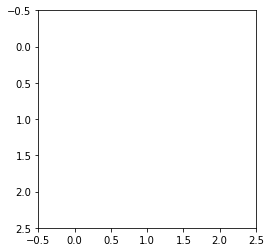

In [59]:
plt.imshow(img_)

In [60]:
img_

tensor([[[ 1.,  2.,  3.],
         [ 4.,  5.,  6.],
         [ 7.,  8.,  9.]],

        [[ 2.,  3.,  4.],
         [ 5.,  6.,  7.],
         [ 8.,  9., 10.]],

        [[ 3.,  4.,  5.],
         [ 6.,  7.,  8.],
         [ 9., 10., 11.]]])

In [56]:
angle

21

In [49]:
cp (img_)

tensor([[[1.0000, 0.9961, 0.9922],
         [0.9882, 0.9843, 0.9804],
         [0.9765, 0.9725, 0.9686]],

        [[0.9961, 0.9922, 0.9882],
         [0.9843, 0.9804, 0.9765],
         [0.9725, 0.9686, 0.9647]],

        [[0.9922, 0.9882, 0.9843],
         [0.9804, 0.9765, 0.9725],
         [0.9686, 0.9647, 0.9608]]])

In [12]:
import os
import json
import numpy as np
import scipy.misc # for saving 
from PIL import Image

import torch

from torch.utils.data import Dataset
from torchvision.transforms import Compose, Resize, Normalize, ToTensor
import torchvision.transforms.functional as FT

from yjlib.prep.ImgPrep import ImgPrep 


class EndoDataset(Dataset):
    def __init__(self, DATA_PATH, IMAGE_SIZE, split, get_path_flag=True):
        self.imgPrep = ImgPrep() 
        
        # data path
        self.DATA_PATH = DATA_PATH
        self.IMAGE_SIZE = IMAGE_SIZE
        self.get_path_flag = get_path_flag

        self.split = split.upper()
        assert self.split in {'TRAIN','VAL', 'TEST'}

        # Read data files
        with open(os.path.join(DATA_PATH, self.split + '_images.json'), 'r') as j:
            self.images = json.load(j) # image data pathes in file

        with open(os.path.join(DATA_PATH, self.split + '_labels.json'), 'r') as j:
            self.labels = json.load(j) # boxes and labels data pathes in file

        assert len(self.images) == len(self.labels) # if do not match number of images with number of boxes and labels.
        
    def __getitem__(self, i):
        """getitem
        Parameter
        ---------
        i: number of order data
        
        PIL(raw_image) -> array -> PIL -> Tensor(prep_image)
        
        """
        raw_image = Image.open(self.images[i], mode = 'r') # read PIL Image

        # image processing
        removed_image = self.imgPrep.remove_pad(np.array(raw_image))# convert PIL to array # remove pad
        
        # Transform
        
        
        label = self.labels[i]
        tensor_label = torch.FloatTensor([label])
        
        content_transform = Compose([Resize(self.IMAGE_SIZE),
                                                ToTensor(),
#                                                 Normalize([0,0,0],[1,1,1])
                                                ])
        
        pil_image = Image.fromarray(removed_image) # Convert array to pil
        prep_image = content_transform(pil_image) # transform needs PIL image
        
        del raw_image, removed_image, pil_image, label
        
        if self.get_path_flag == False:
            return prep_image, tensor_label
        elif self.get_path_flag == True:
            return prep_image, tensor_label , self.images[i]
    
    
    
    def __len__(self):
        return len(self.images)